In [1]:
from keras.datasets import cifar10

((x_train, y_train), (x_test, y_test)) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
import numpy as np

I = np.eye(10)
y_train = I[y_train.flatten()]
y_test = I[y_test.flatten()]

#%%
x_train = x_train / 255
x_test = x_test / 255

#%%
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [3]:
from keras.models import Model
from keras.layers import Input, Dense

x = Input(shape=(3072,))
z = Dense(200, activation='relu')(x)
o = Dense(10, activation='softmax')(z)

model = Model(inputs=x, outputs=o)
model.summary()





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [5]:
train_history = model.fit(
        x_train,
        y_train,
        validation_split=0.2,
        batch_size=500,
        epochs=50,
        verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/50





40000/40000 [==============================] - 1s 36us/step - loss: 2.0814 - acc: 0.2694 - val_loss: 1.8798 - val_acc: 0.3395
Epoch 2/50
40000/40000 [==============================] - 1s 27us/step - loss: 1.8361 - acc: 0.3540 - val_loss: 1.8461 - val_acc: 0.3483
Epoch 3/50
40000/40000 [==============================] - 1s 27us/step - loss: 1.7666 - acc: 0.3819 - val_loss: 1.7719 - val_acc: 0.3769
Epoch 4/50
40000/40000 [==============================] - 1s 27us/step - loss: 1.7233 - acc: 0.4003 - val_loss: 1.7512 - val_acc: 0.3901
Epoch 5/50
40000/40000 [==============================] - 1s 27us/step - loss: 1.6964 - acc: 0.4069 - val_loss: 1.7410 - val_acc: 0.3865
Epoch 6/50
40000/40000 [==============================] - 1s 27us/step - loss: 1.6658 - acc: 0.4190 - val_loss: 1.7140 - val_acc: 0.3957
Epoch 7/50
40000/40000 [==

In [6]:
# Deep model
d = Dense(180, activation='relu')(x)
d = Dense(100, activation='relu')(d)
d = Dense(100, activation='relu')(d)
d = Dense(100, activation='relu')(d)
d = Dense(100, activation='relu')(d)
d = Dense(100, activation='relu')(d)
g = Dense(10, activation='softmax')(d)

model_deep = Model(inputs=x, outputs=g)
model_deep.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               553140    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               18100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
__________

In [9]:
model_deep.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_deep = model_deep.fit(
        x_train,
        y_train,
        validation_split=0.2,
        batch_size = 500,
        epochs = 50,
        verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 2s 49us/step - loss: 2.0021 - acc: 0.2580 - val_loss: 1.8804 - val_acc: 0.3216
Epoch 2/50
40000/40000 [==============================] - 1s 32us/step - loss: 1.7864 - acc: 0.3535 - val_loss: 1.7449 - val_acc: 0.3695
Epoch 3/50
40000/40000 [==============================] - 1s 32us/step - loss: 1.7046 - acc: 0.3814 - val_loss: 1.7128 - val_acc: 0.3842
Epoch 4/50
40000/40000 [==============================] - 1s 32us/step - loss: 1.6585 - acc: 0.4032 - val_loss: 1.6720 - val_acc: 0.4031
Epoch 5/50
40000/40000 [==============================] - 1s 32us/step - loss: 1.6149 - acc: 0.4191 - val_loss: 1.6973 - val_acc: 0.3999
Epoch 6/50
40000/40000 [==============================] - 1s 33us/step - loss: 1.5707 - acc: 0.4314 - val_loss: 1.5899 - val_acc: 0.4324
Epoch 7/50
40000/40000 [==============================] - 1s 32us/step - loss: 1.5504 - acc: 0.4411 - val_loss: 1.6036 - val_acc

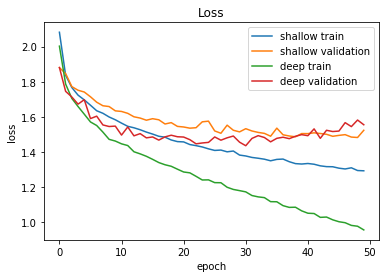

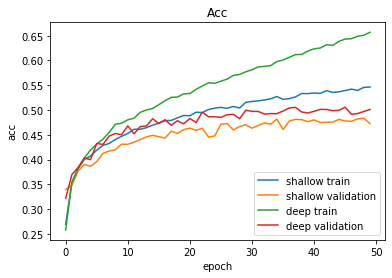

In [10]:
import matplotlib.pyplot as plt

plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.plot(train_history_deep.history['loss'])
plt.plot(train_history_deep.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['shallow train', 'shallow validation', 'deep train', 'deep validation'], loc='upper right')
plt.show()
plt.close()

plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.plot(train_history_deep.history['acc'])
plt.plot(train_history_deep.history['val_acc'])
plt.title('Acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['shallow train', 'shallow validation', 'deep train', 'deep validation'], loc='lower right')
plt.show()
plt.close()

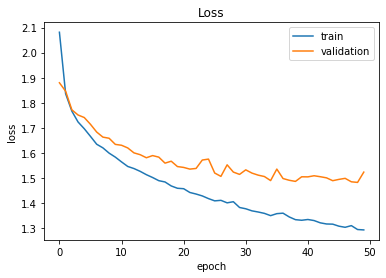

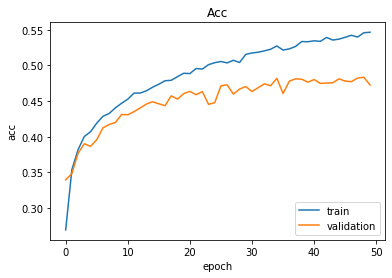

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()
plt.close()

plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
plt.close()